### Assumption

Each arm gives rewards from a Gaussian distribution of variance 1, and means drawn from a Gaussian distribution of mean 0, variance 3 when they are created.

In [13]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Creation of the class Environment

In [4]:
class Environment(object):
    
    def __init__(self, K_arms):        
        self.K_arms = K_arms
        self.Arm_means = np.zeros(K_arms)
        self.init_arm_means()
        
    def init_arm_means(self):
        for i in range(self.K_arms):
            self.Arm_means[i] = np.random.normal(0,3)
        
    def pull_arm(self, Arm):        
        if Arm < 0 or Arm > self.K_arms - 1 :
            raise Exception (f"The chosen Arm should belong in the interval [0,{self.K_arms-1}]")
        else:
            return np.random.normal(self.Arm_means[Arm], 1)

### The $\epsilon-$greedy action

In [5]:
class EpsilonGreedyAgent(object):
    
    def __init__(self, Environment, number_of_iteration, epsilon):       
        self.epsilon = epsilon
        self.number_of_iteration = number_of_iteration
        self.Environment = Environment
        
    def action(self):       
        q_values = np.zeros((self.Environment.K_arms))
        arm_rewards = np.zeros((self.Environment.K_arms))
        arm_counts = np.zeros((self.Environment.K_arms))
        
        rewards = []
        average_rewards = []
        
        for i in range(self.number_of_iteration):           
            if np.random.rand() < self.epsilon:
                Arm = np.random.choice(self.Environment.K_arms)
            else :
                Arm = np.argmax(q_values)      
            reward = self.Environment.pull_arm(Arm)
            
            arm_rewards[Arm] += reward
            arm_counts[Arm] += 1
            q_values[Arm] = arm_rewards[Arm]/arm_counts[Arm]       
            rewards.append(reward)
            average_rewards.append(sum(rewards)/len(rewards))
            
        return np.array(rewards)

### Optimistic Initial Value $Q_1$

In [6]:
class OptimisticInitialValue(object):
    
    def __init__(self, Environment, number_of_iteration, Q1):       
        self.Q1 = Q1
        self.number_of_iteration = number_of_iteration
        self.Environment = Environment
        
    def action(self):       
        q_values = np.zeros((self.Environment.K_arms))
        q_values.fill(self.Q1)
        arm_rewards = self.Q1*np.ones((self.Environment.K_arms))
        arm_counts = np.ones((self.Environment.K_arms))
        
        rewards = []
        average_rewards = []
        
        for i in range(self.number_of_iteration): 
            
            Arm = np.argmax(q_values)     
            reward = self.Environment.pull_arm(Arm)
            
            arm_rewards[Arm] += reward
            arm_counts[Arm] += 1
            q_values[Arm] = arm_rewards[Arm]/arm_counts[Arm]       
            rewards.append(reward)
            average_rewards.append(sum(rewards)/len(rewards))
            
        return np.array(rewards)

### Upper Confidence Bound (UCB) Action

In [7]:
class UpperConfidenceBound(object):
    
    def __init__(self, Environment, number_of_iteration, ucb):       
        self.ucb = ucb
        self.number_of_iteration = number_of_iteration
        self.Environment = Environment
        
    def action(self):       
        q_values = np.zeros((self.Environment.K_arms))
        arm_rewards = np.ones((self.Environment.K_arms))
        arm_counts = np.ones((self.Environment.K_arms))
        
        rewards = []
        average_rewards = []
        
        for i in range(1, self.number_of_iteration+1): 
            
            alpha = np.sqrt((np.log(i))/arm_counts)
            Arm = np.argmax(q_values + self.ucb*alpha)     
            reward = self.Environment.pull_arm(Arm)
            
            arm_rewards[Arm] += reward
            arm_counts[Arm] += 1
            q_values[Arm] = arm_rewards[Arm]/arm_counts[Arm]       
            rewards.append(reward)
            average_rewards.append(sum(rewards)/len(rewards))
            
        return np.array(rewards)


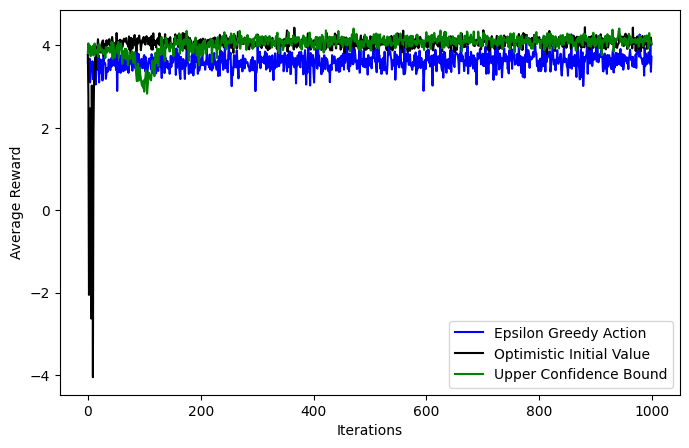

In [12]:
Environment1 = Environment(10)
iteration = 1000
EpsilonGreedyAgent1 = EpsilonGreedyAgent(Environment1, iteration, 0.1)
OptimisticInitialValue1 = OptimisticInitialValue(Environment1, iteration, 5)
UpperConfidenceBound1 = UpperConfidenceBound(Environment1, iteration, 2)

OptimisticIV = np.zeros(iteration)
EpsGreedy = np.zeros(iteration)
UpperCB = np.zeros(iteration)

run = 100
for i in range(1,run+1):
    
    EpsGreedy += (EpsilonGreedyAgent1.action())
    OptimisticIV += (OptimisticInitialValue1.action())
    UpperCB += (UpperConfidenceBound1.action())

EpsGreedy = EpsGreedy/run
OptimisticIV = OptimisticIV/run
UpperCB = UpperCB/run

plt.figure(figsize=(8,5))
plt.plot(EpsGreedy, color = "b", label="Epsilon Greedy Action")
plt.plot(OptimisticIV, color = "k", label="Optimistic Initial Value")
plt.plot(UpperCB, color = "g", label="Upper Confidence Bound")
plt.legend()
plt.xlabel("Iterations")
plt.ylabel("Average Reward")
plt.show()